## 4. Regression analysis

### 1. Importing libraries

### 2. Importing data

### 3. Data cleaning

### 4. Data exploring

### 5. Regression analysis

### 6. Regression analysis on the training set

### 7. Model performance on test set

#### 1. Importing libraries

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Getting matplotlib visuals to appear in the notebook
%matplotlib inline

#### 2. Importing data

In [8]:
path = r'C:\Users\Priya\OneDrive\Documents\CareerFoundry\Data Immersion\Achievement 6\Greenhouse Gas Emissions Analysis'

In [10]:
path

'C:\\Users\\Priya\\OneDrive\\Documents\\CareerFoundry\\Data Immersion\\Achievement 6\\Greenhouse Gas Emissions Analysis'

In [12]:
# Importing the greenhouse gas emissions dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'emissions-cleaned.csv'), index_col = False)

Contains public sector information licensed under the Open Government Licence v3.0. License: https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/

#### 3. Data cleaning

In [15]:
# Checking the shape of the dataframe
df.shape

(533016, 16)

In [17]:
# Viewing the first five rows of the dataframe
df.head()

,Unnamed: 0,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.678178,1.678178,90.457,98.3466
1,1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.052700,0.000000,90.457,98.3466
2,2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006770,0.000000,90.457,98.3466
3,3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.311375,0.311375,90.457,98.3466
4,4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.010500,0.000000,90.457,98.3466


In [19]:
# Dropping the Unnamed: 0 column
df.drop('Unnamed: 0', axis=1, inplace = True)

In [21]:
# Checking the shape of the dataframe
df.shape

(533016, 15)

In [23]:
# Checking if the Unnamed: 0 column was removed
df.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.678178,1.678178,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.052700,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006770,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.311375,0.311375,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.010500,0.000000,90.457,98.3466


In [26]:
# Checking for mixed-type data
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

C:\Users\Priya\AppData\Local\Temp\ipykernel_26308\3509108508.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Priya\AppData\Local\Temp\ipykernel_26308\3509108508.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)


Country Code


C:\Users\Priya\AppData\Local\Temp\ipykernel_26308\3509108508.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Priya\AppData\Local\Temp\ipykernel_26308\3509108508.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)


Region Code
Second Tier Authority


C:\Users\Priya\AppData\Local\Temp\ipykernel_26308\3509108508.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Priya\AppData\Local\Temp\ipykernel_26308\3509108508.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Priya\AppData\Local\Temp\ipykernel_26308\3509108508.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Priya\AppData\Local\Temp\ipykernel_26308\3509108508.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Priya\AppData\Local\Temp\ipykernel_26308\3509108508.py:3: F

In [28]:
# Changing data type for Country Code, Region Code, and Second Tier Authority columns
df['Country Code'] = df['Country Code'].astype('str')
df['Region Code'] = df['Region Code'].astype('str')
df['Second Tier Authority'] = df['Second Tier Authority'].astype('str')

In [30]:
# Checking for mixed-type data again to make sure that there are no columns with mixed-type data
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

C:\Users\Priya\AppData\Local\Temp\ipykernel_26308\4085031835.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Priya\AppData\Local\Temp\ipykernel_26308\4085031835.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Priya\AppData\Local\Temp\ipykernel_26308\4085031835.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Priya\AppData\Local\Temp\ipykernel_26308\4085031835.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Priya\AppData\Local\Temp\ipykernel_26308\4085031835.py:3: F

In [32]:
# Creating the df_dups subset to check for duplicates
df_dups = df[df.duplicated()]

In [34]:
# Viewing df_dups
df_dups

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)


In [38]:
# Checking for missing data
df.isnull().sum()

Country                                                        0
Country Code                                                   0
Region                                                         0
Region Code                                                    0
Second Tier Authority                                          0
Local Authority                                                0
Local Authority Code                                           0
Calendar Year                                                  0
LA GHG Sector                                                  0
LA GHG Sub-sector                                              0
Greenhouse gas                                                 0
Territorial emissions (kt CO2e)                                0
CO2 emissions within the scope of influence of LAs (kt CO2)    0
Mid-year Population (thousands)                                0
Area (km2)                                                     0
dtype: int64

#### 4. Exploring data

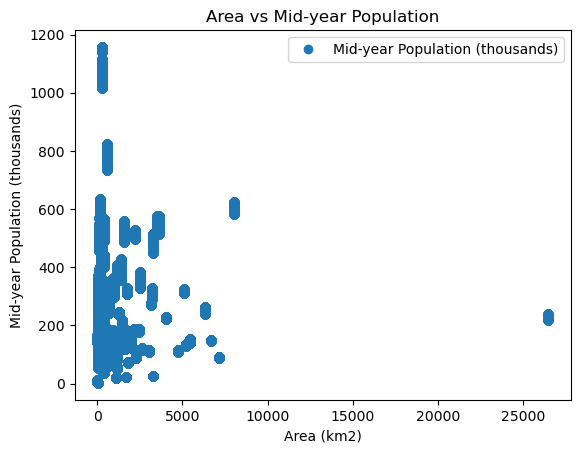

In [43]:
# Creating a scatterplot to see the relationship between Area (km2) and Mid-year Population (thousands)
df.plot(x = 'Area (km2)', y= 'Mid-year Population (thousands)',style='o')
plt.title('Area vs Mid-year Population')  
plt.xlabel('Area (km2)')  
plt.ylabel('Mid-year Population (thousands)')  
plt.show()

Hypothesis: If Area (km2) increases, then Mid-year Population (thousands) increases.

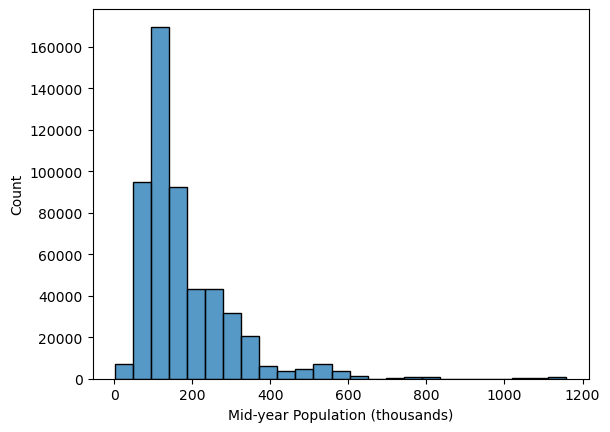

In [71]:
# Checking for extreme values
sns.histplot(df['Mid-year Population (thousands)'], bins=25)
plt.show()

In [46]:
# Reshaping the variables into NumPy arrays and putting them into separate objects
X = df['Area (km2)'].values.reshape(-1,1)
y = df['Mid-year Population (thousands)'].values.reshape(-1,1)

In [48]:
# Viewing X
X

array([[ 98.3466],
       [ 98.3466],
       [ 98.3466],
       ...,
       [111.9569],
       [111.9569],
       [111.9569]])

In [50]:
# Viewing y
y

array([[90.457],
       [90.457],
       [90.457],
       ...,
       [58.883],
       [58.883],
       [58.883]])

In [52]:
# Splitting data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 5. Regression analysis

In [55]:
# Creating a regression object
regression = LinearRegression()

In [57]:
# Fitting the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [59]:
# Creating a prediction for y on the test set
y_predicted = regression.predict(X_test)

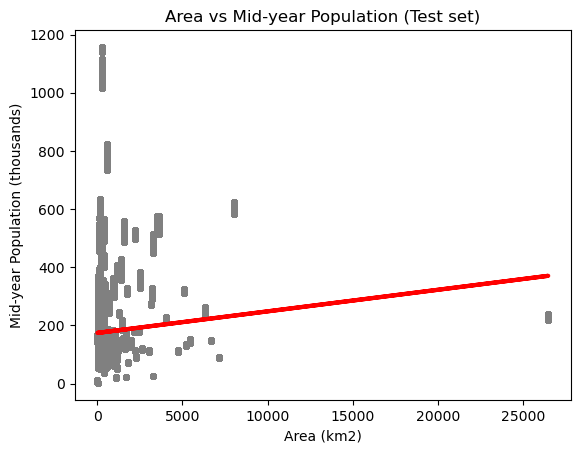

In [61]:
# Creating a plot that shows the regression line on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s= 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Area vs Mid-year Population (Test set)')
plot_test.xlabel('Area (km2)')
plot_test.ylabel('Mid-year Population (thousands)')
plot_test.show()

Looking at the plot, the line does not appear to fit the data very well. Most points are not very close to the line. The line is likely not following the data very well because of the low population of the area that is greater than 25000 km2. For the data to fit the line better, the line should have been much steeper.

In [76]:
# Creating the MSE and R2 score
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [78]:
# Checking the Slope, MSE, and R2 score
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00742014]]
Mean squared error:  14492.439393197523
R2 score:  0.011120349356883441


In [80]:
# Creating a dataframe with the predicted y values and actual y values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(50)

,Actual,Predicted
0,110.702000,174.920639
1,457.523000,175.099833
2,159.384654,178.477533
3,116.432147,175.070173
4,27.600000,198.360946
5,115.704000,174.921928
6,130.874330,179.155305
7,63.501000,181.493539
8,191.407761,174.545010
9,226.698000,174.527379


#### 6. Regression analysis on the training set

In [83]:
# Creating a prediction for y on the train set
y_predicted_train = regression.predict(X_train)

In [85]:
# Creating the MSE and R2 score
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [87]:
# Checking the Slope, MSE, and R2 score
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00742014]]
Mean squared error:  14496.68220006738
R2 score:  0.011315569640548362


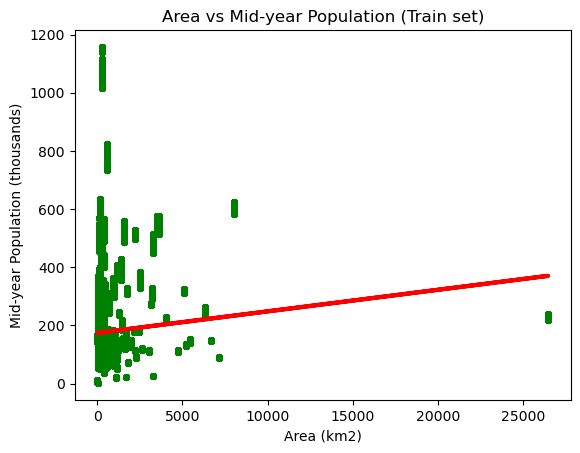

In [89]:
# Creating a plot that shows the regression line on the training set
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Area vs Mid-year Population (Train set)')
plot_test.xlabel('Area (km2)')
plot_test.ylabel('Mid-year Population (thousands)')
plot_test.show()

#### 7. Model performance on test set

The slope of the model on the test set is 0.0074, which indicates that there is a positive relationship between Area and Mid-year Population, meaning that as Area increases, so does Mid-year Population. The mean squared error of 14492.44 is quite large and indicates that the regression line is far from the data points, which further indicates that the data is not accurately represented by the regression line. This further means that the regression model does not accurately predict the effect of Area on Mid-year Population. The r-squared value of 0.0111 is very close to 0 and is 1.11% out of 100, which indicates that the model is a poor fit. By looking at the dataframe with the predicted y values and actual y values, it is clear that the regression model did not perform well because of the large differences between the actual and predicted y values. Running the regression model on the training set resulted in a r-squared value of 0.0113, which is very slightly higher than the r-squared value of 0.0111 from the test set, meaning that the model was not overfit. The data points for the area that is greater than 25000 km2 are extreme values, since all other areas are smaller than  10000 km2. Removing the data points for the over 25000 km2 area would improve the performance of the model, however, there is no reasonable justification for removing these data points and removing them could introduce bias in the model.